In [4]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

In [5]:
# 학습이 완료된 모델을 저장할 파일 이름
best_model_path = 'model/best_model_train.dat'
# 교차검증 횟수
cv_count = 10
# 교차 검증
kfold = KFold(n_splits=cv_count, shuffle=True, random_state=1)
# 평가 결과를 담을 리스트
# 필요하다면 다른 것도 만들어주세요
f1_score_list = []
# 학습 모델 이름
model_name_list = []

In [6]:
import pandas as pd

# 1. 각 파일 경로
file_1_path = "C:/Users/HR/Desktop/workspace/파이널프로젝트/정보/Train/03.승인매출 정보(train).csv"
file_2_path = "C:/Users/HR/Desktop/workspace/파이널프로젝트/정보/Train/3.승인매출2_train.csv"
file_3_path = "C:/Users/HR/Desktop/workspace/파이널프로젝트/정보/Train/청구잔액정보_병합(train).csv"
file_4_path = "C:/Users/HR/Desktop/workspace/파이널프로젝트/정보/Train/Train회원정보2_요약.csv"

# 2. 파일 읽기
df1 = pd.read_csv(file_1_path)
df2 = pd.read_csv(file_2_path)
df3 = pd.read_csv(file_3_path)
df4 = pd.read_csv(file_4_path)

# 3. 병합 기준 키
merge_keys = ['ID', '기준년월']

# 4. 병합 순차 수행
merged1 = df1.merge(df2, on=merge_keys, how='inner')
merged2 = merged1.merge(df3, on=merge_keys, how='inner')
final_merged = merged2.merge(df4, on=merge_keys, how='inner')

# 5. 결과 확인
print("최종 병합된 shape:", final_merged.shape)
print(final_merged.head())


최종 병합된 shape: (2400000, 20)
             ID  _2순위업종_이용금액  최대이용금액_일시불_R12M  납부_기타이용금액  쇼핑_편의점_이용금액  \
0  TRAIN_000000         1408             4906         44            0   
1  TRAIN_000001         2083            10407          0          315   
2  TRAIN_000002         1539            10112          0          239   
3  TRAIN_000003         2284             3075          0            0   
4  TRAIN_000004            0               62          0            0   

   _2순위교통업종_이용금액  최대이용금액_CA_R12M  교통_정비이용금액    기준년월  할부금액_무이자_3M_R12M  \
0            105           11710          0  201807              1314   
1            443            3377          0  201807              2076   
2              0           65977          0  201807                 0   
3              0           19698          0  201807             12098   
4              0               0          0  201807                 0   

   이용개월수_온라인_R6M  연속유실적개월수_기본_24M_카드      이용금액대  청구금액_R6M  평잔_일시불_해외_6M  \
0              1   

In [7]:
from sklearn.preprocessing import LabelEncoder

# Segment가 문자형이면 숫자형으로 변환
if final_merged['Segment'].dtype == 'object' or final_merged['Segment'].dtype.name == 'category':
    le = LabelEncoder()
    final_merged['Segment'] = le.fit_transform(final_merged['Segment'].astype(str))

# 확인
print(final_merged['Segment'].value_counts())

Segment
4    1922052
3     349242
2     127590
0        972
1        144
Name: count, dtype: int64


In [8]:
print(final_merged.info())  # 데이터 타입, 결측치 확인
print(final_merged.describe())  # 수치형 요약 통계
print(final_merged.isnull().sum())  # 결측치 컬럼별 개수


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 20 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ID                  object
 1   _2순위업종_이용금액         int64 
 2   최대이용금액_일시불_R12M     int64 
 3   납부_기타이용금액           int64 
 4   쇼핑_편의점_이용금액         int64 
 5   _2순위교통업종_이용금액       int64 
 6   최대이용금액_CA_R12M      int64 
 7   교통_정비이용금액           int64 
 8   기준년월                int64 
 9   할부금액_무이자_3M_R12M    int64 
 10  이용개월수_온라인_R6M       int64 
 11  연속유실적개월수_기본_24M_카드  int64 
 12  이용금액대               object
 13  청구금액_R6M            int64 
 14  평잔_일시불_해외_6M        int64 
 15  잔액_일시불_B2M          int64 
 16  평잔_일시불_6M           int64 
 17  이용카드수_신용체크          int64 
 18  _1순위카드이용건수          int64 
 19  Segment             int32 
dtypes: int32(1), int64(17), object(2)
memory usage: 357.1+ MB
None
        _2순위업종_이용금액  최대이용금액_일시불_R12M     납부_기타이용금액   쇼핑_편의점_이용금액  \
count  2.400000e+06     2.400000e+06  2.400000e

In [9]:
final_merged = final_merged.dropna()  # 간단하게 제거
# 또는
final_merged.fillna(0, inplace=True)  # 0으로 채우기 (분석 목적에 따라 조정)


In [40]:
import pandas as pd

# 🔹 1. IQR 기반 이상치 개수 계산 함수 정의
def count_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((series < lower) | (series > upper)).sum()

# 🔹 2. 수치형 변수만 선택
numeric_df = final_merged.select_dtypes(include='number')

# 🔹 3. 이상치 개수 계산
outlier_counts = numeric_df.apply(count_outliers)

# 🔹 4. 정렬해서 보기
outlier_counts = outlier_counts.sort_values(ascending=False)

# 🔹 5. 결과 출력
print("📌 변수별 이상치 개수 (내림차순):")
print(outlier_counts)


📌 변수별 이상치 개수 (내림차순):
납부_기타이용금액             566611
교통_정비이용금액             526724
Segment               477948
최대이용금액_CA_R12M        304404
평잔_일시불_해외_6M          302688
할부금액_무이자_3M_R12M      286700
잔액_일시불_B2M            213717
평잔_일시불_6M             203731
최대이용금액_일시불_R12M       178856
청구금액_R6M              174712
_2순위업종_이용금액           164069
쇼핑_편의점_이용금액           160780
_1순위카드이용건수            135983
_2순위교통업종_이용금액         120548
이용카드수_신용체크             81811
연속유실적개월수_기본_24M_카드         0
기준년월                       0
이용개월수_온라인_R6M              0
dtype: int64


In [42]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Segment 문자형이면 숫자형으로 변환
le = LabelEncoder()

if final_merged['Segment'].dtype == 'object' or final_merged['Segment'].dtype.name == 'category':
    final_merged['Segment'] = le.fit_transform(final_merged['Segment'].astype(str))
else:
    le.fit(final_merged['Segment'])

# 2. 매핑 확인
print("문자 → 숫자 매핑:", dict(zip(le.classes_, le.transform(le.classes_))))
segment_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print("숫자 → 문자 매핑:", segment_mapping)

# 3. 상관계수 분석 (수치형 컬럼만 대상으로)
num_df = final_merged.select_dtypes(include='number')  # 수치형 컬럼만 추출

# 4. Segment와 다른 변수 간 상관관계 계산
corr_series = num_df.corr()['Segment'].drop('Segment').sort_values(key=abs, ascending=False)

# 5. 결과 출력
print("\n✅ Segment와 상관관계 높은 변수 Top 10:")
print(corr_series.head(10))


문자 → 숫자 매핑: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
숫자 → 문자 매핑: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

✅ Segment와 상관관계 높은 변수 Top 10:
청구금액_R6M             -0.597904
_2순위업종_이용금액          -0.492209
최대이용금액_일시불_R12M      -0.486145
평잔_일시불_6M            -0.447967
이용카드수_신용체크           -0.397713
_1순위카드이용건수           -0.383609
잔액_일시불_B2M           -0.373494
연속유실적개월수_기본_24M_카드   -0.357340
_2순위교통업종_이용금액        -0.350393
교통_정비이용금액            -0.338576
Name: Segment, dtype: float64


In [43]:
# 수치형 컬럼만 추출
numeric_cols = final_merged.select_dtypes(include='number').columns.tolist()

# 종속변수 y: Segment
y = final_merged['Segment']

# 설명변수 X: Segment 제외한 수치형 변수
X = final_merged[numeric_cols].drop(columns='Segment')

# 확인
print(" X shape:", X.shape)
print(" y shape:", y.shape)
print(" 예측에 사용할 수치형 변수 목록:")
print(X.columns.tolist())


 X shape: (2400000, 17)
 y shape: (2400000,)
 예측에 사용할 수치형 변수 목록:
['_2순위업종_이용금액', '최대이용금액_일시불_R12M', '납부_기타이용금액', '쇼핑_편의점_이용금액', '_2순위교통업종_이용금액', '최대이용금액_CA_R12M', '교통_정비이용금액', '기준년월', '할부금액_무이자_3M_R12M', '이용개월수_온라인_R6M', '연속유실적개월수_기본_24M_카드', '청구금액_R6M', '평잔_일시불_해외_6M', '잔액_일시불_B2M', '평잔_일시불_6M', '이용카드수_신용체크', '_1순위카드이용건수']


In [49]:
from sklearn.model_selection import train_test_split

# 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 검증용 20%
    random_state=42,     # 결과 재현 가능하게
    stratify=y           # 클래스 비율 유지 (Segment가 분류 문제니까)
)

# 확인
print(" X_train shape:", X_train.shape)
print(" X_test shape:", X_test.shape)
print(" y_train 분포:")
print(y_train.value_counts())
print(" y_test 분포:")
print(y_test.value_counts())


 X_train shape: (1920000, 17)
 X_test shape: (480000, 17)
 y_train 분포:
Segment
4    1537641
3     279394
2     102072
0        778
1        115
Name: count, dtype: int64
 y_test 분포:
Segment
4    384411
3     69848
2     25518
0       194
1        29
Name: count, dtype: int64


In [50]:
from sklearn.metrics import classification_report, confusion_matrix

print(" [분류 리포트]")
print(classification_report(y_test, y_pred))  # target_names 제거

print(" [혼동 행렬]")
print(confusion_matrix(y_test, y_pred))


 [분류 리포트]
              precision    recall  f1-score   support

           0       0.09      0.15      0.11       194
           1       0.05      0.07      0.06        29
           2       0.61      0.44      0.51     25518
           3       0.56      0.47      0.51     69848
           4       0.91      0.95      0.93    384411

    accuracy                           0.86    480000
   macro avg       0.44      0.42      0.42    480000
weighted avg       0.84      0.86      0.85    480000

 [혼동 행렬]
[[    29      3    151      9      2]
 [     2      2     24      1      0]
 [   181     14  11227   9140   4956]
 [    72     15   5139  32626  31996]
 [    33      7   1835  16017 366519]]


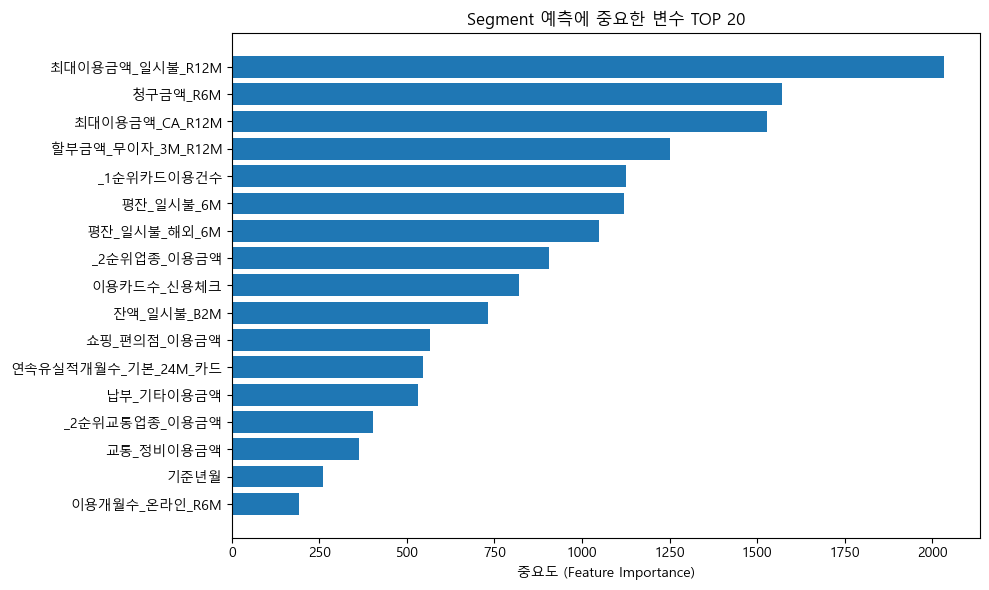

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# 변수 중요도 추출
importances = model.feature_importances_
feature_names = X.columns

# 데이터프레임으로 정리
importance_df = pd.DataFrame({
    '변수명': feature_names,
    '중요도': importances
}).sort_values(by='중요도', ascending=False)

# 상위 20개 변수 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['변수명'][:20][::-1], importance_df['중요도'][:20][::-1])
plt.xlabel('중요도 (Feature Importance)')
plt.title('Segment 예측에 중요한 변수 TOP 20')
plt.tight_layout()
plt.show()


In [54]:
# Segment와 다른 변수 간 상관계수 계산
corr_series = final_merged.corr(numeric_only=True)["Segment"].drop("Segment").sort_values(key=abs, ascending=False)

# 상관계수 0.3 이상 변수만 추출
high_corr_vars = corr_series[abs(corr_series) >= 0.3].index.tolist()

# 선택된 변수 개수와 목록 확인
print(f"상관계수 0.3 이상 변수 개수: {len(high_corr_vars)}")
print(high_corr_vars)


상관계수 0.3 이상 변수 개수: 16
['청구금액_R6M', '_2순위업종_이용금액', '최대이용금액_일시불_R12M', '평잔_일시불_6M', '이용카드수_신용체크', '_1순위카드이용건수', '잔액_일시불_B2M', '연속유실적개월수_기본_24M_카드', '_2순위교통업종_이용금액', '교통_정비이용금액', '쇼핑_편의점_이용금액', '할부금액_무이자_3M_R12M', '이용개월수_온라인_R6M', '납부_기타이용금액', '평잔_일시불_해외_6M', '최대이용금액_CA_R12M']


In [55]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X 구성
X = final_merged[high_corr_vars]

# 상수항 추가
X_const = sm.add_constant(X)

# VIF 계산
vif_df = pd.DataFrame()
vif_df["변수"] = X_const.columns
vif_df["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# VIF 10 이하 변수만 선택 (상수항 제외)
filtered_vars = vif_df[(vif_df["VIF"] <= 10) & (vif_df["변수"] != "const")]["변수"].tolist()
print("✅ VIF 10 이하 변수:", filtered_vars)


✅ VIF 10 이하 변수: ['청구금액_R6M', '_2순위업종_이용금액', '최대이용금액_일시불_R12M', '평잔_일시불_6M', '이용카드수_신용체크', '_1순위카드이용건수', '잔액_일시불_B2M', '연속유실적개월수_기본_24M_카드', '_2순위교통업종_이용금액', '교통_정비이용금액', '쇼핑_편의점_이용금액', '할부금액_무이자_3M_R12M', '이용개월수_온라인_R6M', '납부_기타이용금액', '평잔_일시불_해외_6M', '최대이용금액_CA_R12M']


#LightGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3316
[LightGBM] [Info] Number of data points in the train set: 1920000, number of used features: 16
[LightGBM] [Info] Start training from score -7.820147
[LightGBM] [Info] Start training from score -9.872716
[LightGBM] [Info] Start training from score -2.934539
[LightGBM] [Info] Start training from score -1.927891
[LightGBM] [Info] Start training from score -0.221973
📌 [분류 리포트]
              precision    recall  f1-score   support

           0       0.14      0.19      0.16       201
           1       0.00      0.00      0.00        45
           2       0.63      0.45      0.52     25532
           3       0.57      0.46      0.51     69969
           4       0.91      0.95      0.93    384253

    accuracy                          

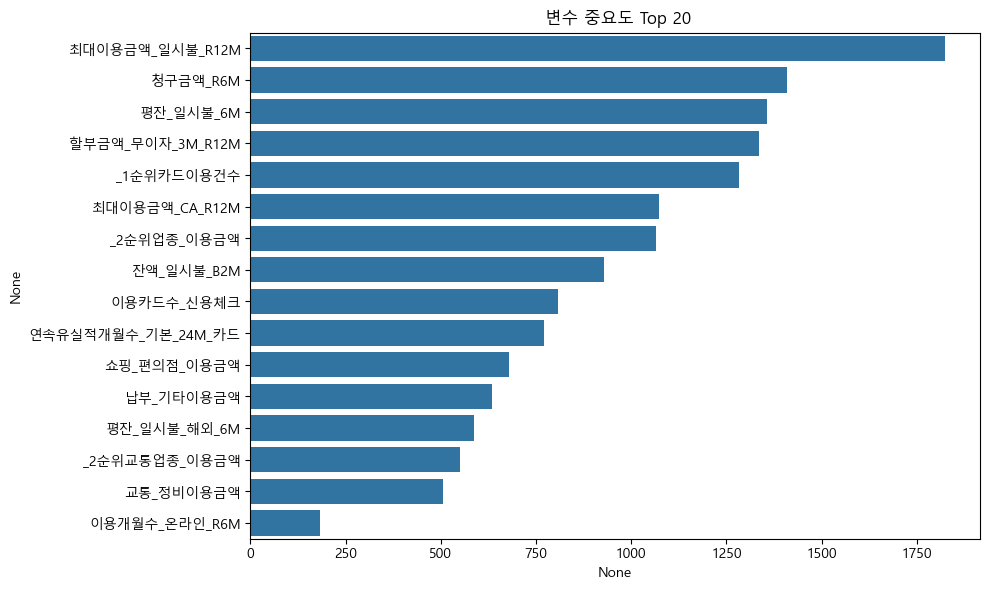

In [57]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 독립변수와 종속변수 정의
X = final_merged[filtered_vars]
y = final_merged['Segment']

# train-test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의 및 학습
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print("📌 [분류 리포트]")
print(classification_report(y_test, y_pred))
print("📌 [혼동 행렬]")
print(confusion_matrix(y_test, y_pred))

# 변수 중요도 시각화 (선택)
import matplotlib.pyplot as plt
import seaborn as sns

feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp[:20], y=feature_imp.index[:20])
plt.title(" 변수 중요도 Top 20")
plt.tight_layout()
plt.show()


In [61]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 독립변수, 종속변수 정의
X = final_merged[filtered_vars]
y = final_merged['Segment']

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의 및 학습
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)

print("📌 [분류 리포트 - XGBoost]")
print(classification_report(y_test, y_pred))

print("📌 [혼동 행렬 - XGBoost]")
print(confusion_matrix(y_test, y_pred))


C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:52:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📌 [분류 리포트 - XGBoost]
              precision    recall  f1-score   support

           0       0.72      0.18      0.29       201
           1       0.60      0.07      0.12        45
           2       0.68      0.47      0.55     25532
           3       0.60      0.49      0.54     69969
           4       0.91      0.96      0.94    384253

    accuracy                           0.87    480000
   macro avg       0.70      0.43      0.49    480000
weighted avg       0.85      0.87      0.86    480000

📌 [혼동 행렬 - XGBoost]
[[    36      0    164      1      0]
 [     4      3     38      0      0]
 [     8      2  11940   9011   4571]
 [     1      0   4419  34044  31505]
 [     1      0   1077  13384 369791]]


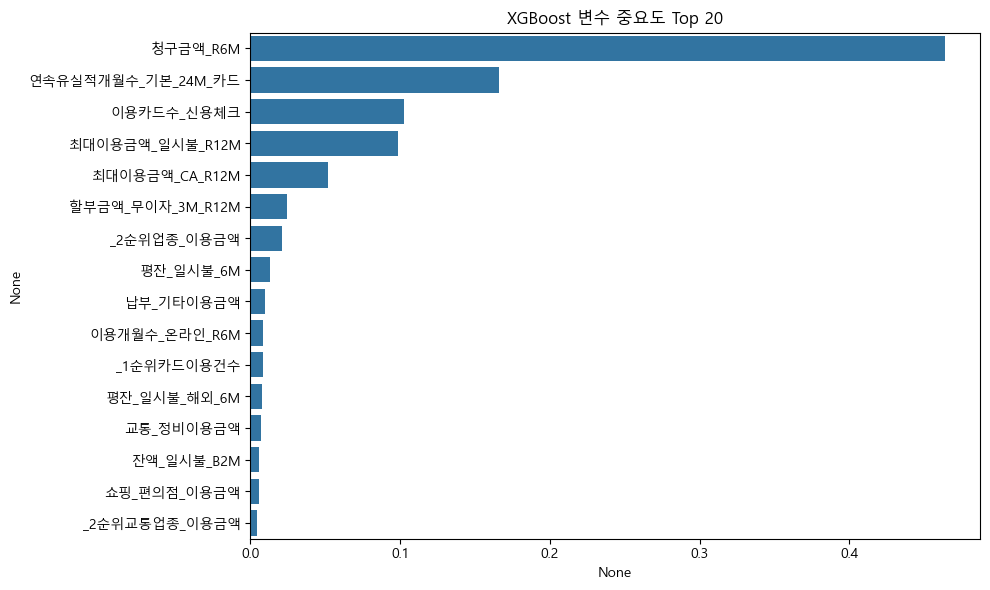

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 변수 중요도 시각화
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp[:20], y=feature_imp.index[:20])
plt.title("XGBoost 변수 중요도 Top 20")
plt.tight_layout()
plt.show()


In [66]:
# LightGBM 학습 직후 예측값 저장
lgbm_pred = model.predict(X_test)  # 이때 model은 LGBM 모델

# 다시 XGBoost 학습 → 새로운 이름으로 저장
from xgboost import XGBClassifier

model_xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(X_train, y_train)
xgb_pred = model_xgb.predict(X_test)



C:\Users\HR\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:59:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [67]:
from sklearn.metrics import accuracy_score

print("✅ LightGBM 정확도:", accuracy_score(y_test, lgbm_pred))
print("✅ XGBoost 정확도:", accuracy_score(y_test, xgb_pred))


✅ LightGBM 정확도: 0.8662791666666667
✅ XGBoost 정확도: 0.8662791666666667


In [68]:
from sklearn.metrics import classification_report

print("✅ [LightGBM 분류 리포트]")
print(classification_report(y_test, lgbm_pred))

print("✅ [XGBoost 분류 리포트]")
print(classification_report(y_test, xgb_pred))


✅ [LightGBM 분류 리포트]
              precision    recall  f1-score   support

           0       0.72      0.18      0.29       201
           1       0.60      0.07      0.12        45
           2       0.68      0.47      0.55     25532
           3       0.60      0.49      0.54     69969
           4       0.91      0.96      0.94    384253

    accuracy                           0.87    480000
   macro avg       0.70      0.43      0.49    480000
weighted avg       0.85      0.87      0.86    480000

✅ [XGBoost 분류 리포트]
              precision    recall  f1-score   support

           0       0.72      0.18      0.29       201
           1       0.60      0.07      0.12        45
           2       0.68      0.47      0.55     25532
           3       0.60      0.49      0.54     69969
           4       0.91      0.96      0.94    384253

    accuracy                           0.87    480000
   macro avg       0.70      0.43      0.49    480000
weighted avg       0.85      0.87     

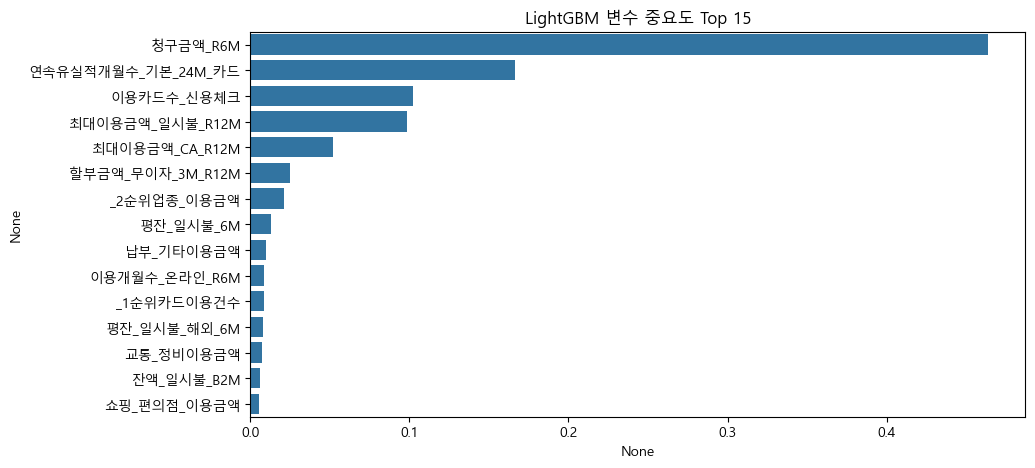

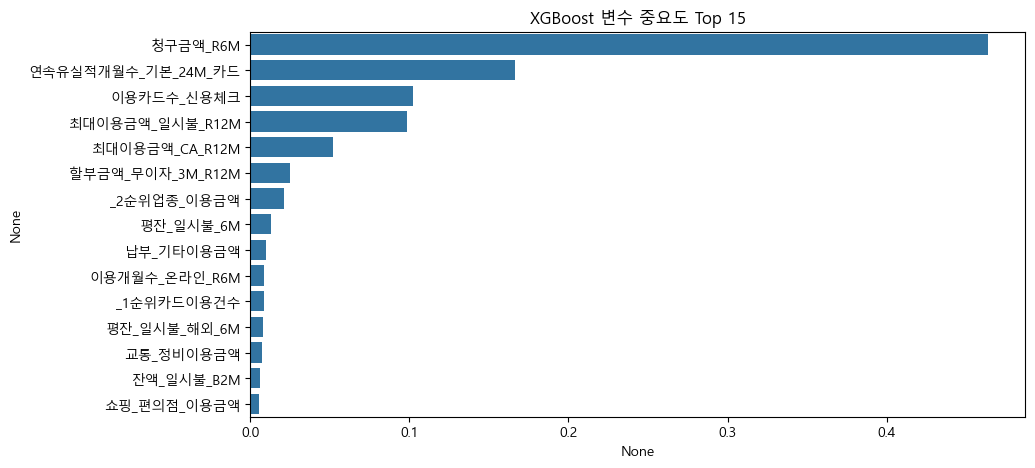

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# LightGBM 중요도
lgbm_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=lgbm_imp[:15], y=lgbm_imp.index[:15])
plt.title("LightGBM 변수 중요도 Top 15")
plt.show()

# XGBoost 중요도
xgb_imp = pd.Series(model_xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=xgb_imp[:15], y=xgb_imp.index[:15])
plt.title("XGBoost 변수 중요도 Top 15")
plt.show()
